In [8]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets

In [35]:
X, y = make_blobs(n_samples = 1500, random_state = 1)

In [10]:
X.shape

(1500, 2)

In [11]:
y.shape

(1500,)

In [21]:
# Too few clusters
y_pred1 = KMeans(n_clusters=2, random_state=123).fit_predict(X)
SilhouetteScore1 = metrics.silhouette_score(X, y_pred1, metric='euclidean')

# Too many clusters
y_pred2 = KMeans(n_clusters=4, random_state=123).fit_predict(X)
SilhouetteScore2 = metrics.silhouette_score(X, y_pred2, metric='euclidean')

# Correct number of clusters
y_pred3 = KMeans(n_clusters=3, random_state=123).fit_predict(X)
SilhouetteScore3 = metrics.silhouette_score(X, y_pred3, metric='euclidean')

Text(0.5, 1.0, 'Correct # of Clusters\nSilhouetteScore: 0.72')

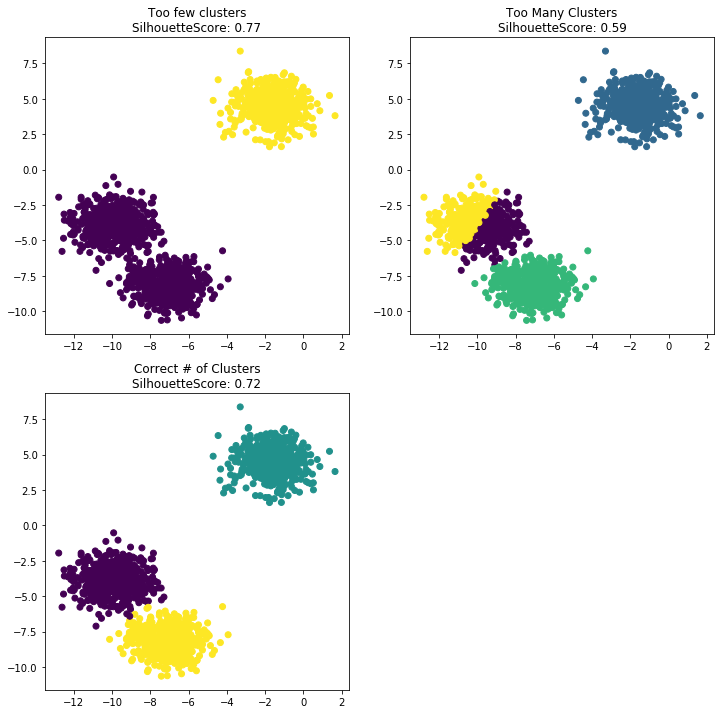

In [22]:
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred1)
plt.title("Too few clusters" + "\nSilhouetteScore: " + str(round(SilhouetteScore1,ndigits = 2)))

plt.subplot(222)
plt.scatter(X[:, 0], X[:, 1], c=y_pred2)
plt.title("Too Many Clusters" + "\nSilhouetteScore: " + str(round(SilhouetteScore2,ndigits = 2)))

plt.subplot(223)
plt.scatter(X[:, 0], X[:, 1], c=y_pred3)
plt.title("Correct # of Clusters" + "\nSilhouetteScore: " + str(round(SilhouetteScore3,ndigits = 2)))

In [30]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [40]:
# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [41]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y, labels,
                                           average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Estimated number of noise points: 79
Homogeneity: 0.933
Completeness: 0.822
V-measure: 0.874
Adjusted Rand Index: 0.912
Adjusted Mutual Information: 0.874
Silhouette Coefficient: 0.648


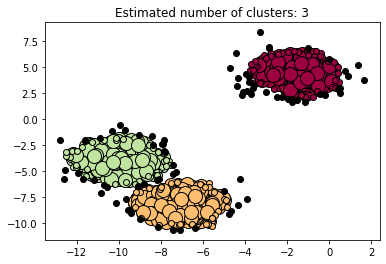

In [42]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()